In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from utils import forecast_accuracy
from utils import test_stationary
from utils import read_oil_price
from utils import components_decomposition

from statsmodels.tsa.arima_model import ARIMA
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6


In [3]:
dataset = read_oil_price()
dataset.head()

,oil.price
Time,
1986-01-31,22.93
1986-02-28,15.45
1986-03-31,12.61
1986-04-30,12.84
1986-05-31,15.38


# Checking for Stationary

Performing Moving average test


/home/dh/anaconda3/envs/domainAdaptation/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


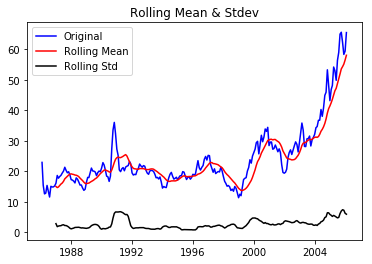

Results of Dickey-Fuller Test:
Test Statistics           1.490404
p-value                   0.997489
#Lags Used               15.000000
#Oberservations Used    225.000000
Critical Value (1%)      -3.459752
Critical Value (5%)      -2.874473
Critical Value (10%)     -2.573663
dtype: float64


In [3]:
test_stationary(dataset)

# Components Decomposition

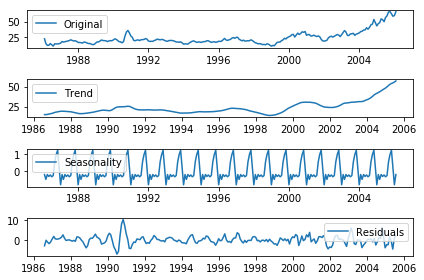

In [4]:
decompositions = components_decomposition(dataset)

# ACF and PACF

In [7]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(dataset, nlags=100)
lag_pacf = pacf(dataset, nlags=100, method='ols')

/home/renjie/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


Text(0.5,1,'Autocorrelation Function')

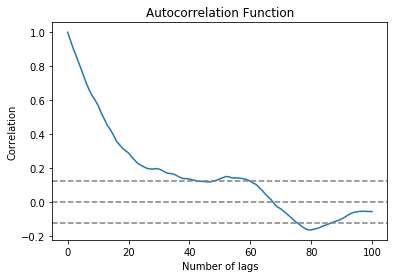

In [9]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset)),linestyle='--',color='gray')
plt.ylabel('Correlation')
plt.xlabel('Number of lags')
plt.title('Autocorrelation Function')

Text(0.5,1,'Partial Autocorrelation Function')

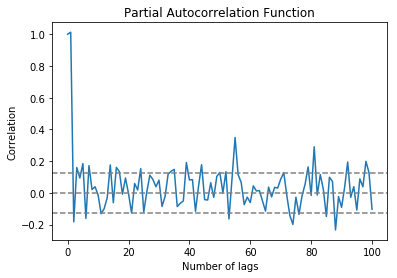

In [10]:
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset)),linestyle='--',color='gray')
plt.ylabel('Correlation')
plt.xlabel('Number of lags')
plt.title('Partial Autocorrelation Function')

## Using auto ARIMA

In [6]:
from pyramid.arima import auto_arima

stepwise_model = auto_arima(dataset, start_p=0, start_q=0, max_p=3, max_q=3,
                            m = 12, start_P=0,start_Q =0, max_P=3, max_Q = 3,
                           d=1, D=1, trace=True)

/home/dh/anaconda3/envs/domainAdaptation/lib/python3.6/site-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1128.462, BIC=1135.320, Fit time=0.059 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1068.348, BIC=1082.065, Fit time=0.242 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1012.798, BIC=1026.515, Fit time=0.330 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=1014.490, BIC=1031.637, Fit time=0.362 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=1116.899, BIC=1127.187, Fit time=0.074 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=1014.435, BIC=1031.582, Fit time=0.702 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=1015.926, BIC=1036.502, Fit time=1.604 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1008.441, BIC=1025.588, Fit time=0.442 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=1015.207, BIC=1028.925, Fit time=0.300 seconds
Fit ARIMA: order=(1, 1, 2) s

## Training and Testing up to Jan

In [7]:
train_til = datetime(year = 2005, month = 1, day= 1)
train = dataset[dataset.index < train_til]
test = dataset[dataset.index >= train_til]

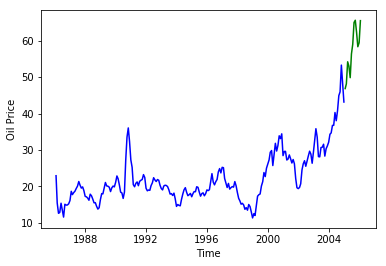

In [8]:
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.plot(train, c = 'b')
plt.plot(test, c = 'g')
plt.show()

In [9]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend='c')

# Evalutation

In [10]:
pred = stepwise_model.predict(n_periods = len(test))

In [11]:
pred = pd.DataFrame(data = pred, index = test.index, columns = ['Predictions'])

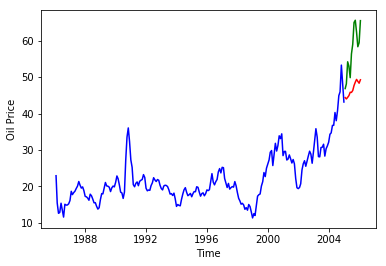

In [12]:
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.plot(train, c = 'b')
plt.plot(test, c = 'g')
plt.plot(pred, c = 'r')
plt.show()

In [13]:
forecast_accuracy(pred['Predictions'], test['oil.price'])

/home/dh/anaconda3/envs/domainAdaptation/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'mape': 0.17573396659867027,
 'me': -10.441268423185555,
 'mae': 10.441268423185555,
 'mpe': -0.17573396659867027,
 'rmse': 11.447849897843813,
 'acf1': 0.5168332768529597,
 'corr': 0.8566587408852244,
 'minmax': 0.17573396659867035}

## Training and Testing up to July

In [14]:
train_til = datetime(year = 2005, month = 7, day= 1)
train = dataset[dataset.index < train_til]
test = dataset[dataset.index >= train_til]

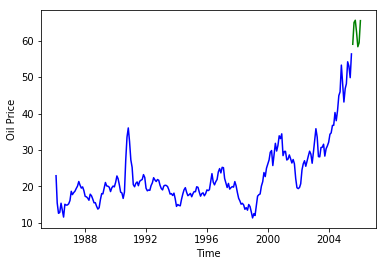

In [15]:
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.plot(train, c = 'b')
plt.plot(test, c = 'g')
plt.show()

In [16]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(0, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=False, transparams=True, trend='c')

# Evalutation

In [17]:
pred = stepwise_model.predict(n_periods = len(test))

In [18]:
pred = pd.DataFrame(data = pred, index = test.index, columns = ['Predictions'])

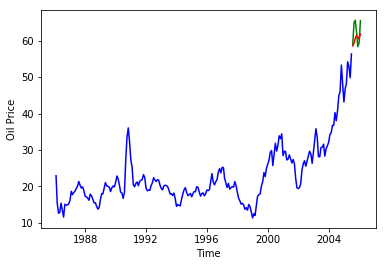

In [19]:
plt.xlabel('Time')
plt.ylabel('Oil Price')
plt.plot(train, c = 'b')
plt.plot(test, c = 'g')
plt.plot(pred, c = 'r')
plt.show()

In [20]:
forecast_accuracy(pred['Predictions'], test['oil.price'])

/home/dh/anaconda3/envs/domainAdaptation/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'mape': 0.043223827778482715,
 'me': -1.69145707453831,
 'mae': 2.750041104567773,
 'mpe': -0.02516553426378573,
 'rmse': 3.360150209535213,
 'acf1': 0.2632189168109157,
 'corr': 0.2704337609761213,
 'minmax': 0.04289485781154523}